<a href="https://colab.research.google.com/github/Deepak-Data-Scientist-IIT/Emergency-vs-Non-Emergency-Vehicle-Classification/blob/master/Emergency_vs_non_Emergency_Vehicle_Classification_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading DataSet**

In [42]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# importing layers from keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential
# importing adam optimizer from keras optimizer module 
from keras.optimizers import Adam
# Importing Convotional Layer and flatten layer from keras
from keras.layers import Conv2D, Flatten
# importing maxpool layer from keras
from keras.layers import MaxPool2D
# importing layers from keras
from keras.layers import Dense, InputLayer, BatchNormalization, Dropout

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
!unzip -uq "drive/My Drive/Dataset.zip"

In [46]:
# Reading the CSV File
data = pd.read_csv('Dataset/emergency_classification.csv')

In [47]:
# Create random number generator
seed = 42

rng = np.random.RandomState(seed)

In [6]:
# Looking the first five rows of the data
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [7]:
# Distribution of classes in the dataset
data['emergency_or_not'].value_counts()

0    1361
1     991
Name: emergency_or_not, dtype: int64

In [48]:
# Load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
  # loading the image using its name
  img = plt.imread('Dataset/images/' + img_name)
  # saving each image in the list
  X.append(img)

# Converting the list of images into array
X = np.array(X)

# Storing the target variable in saperate variable
y = data.emergency_or_not.values

In [49]:
# shape of the image
X.shape, y.shape

((2352, 224, 224, 3), (2352,))

# **Pre-Processing the data**

In [ ]:
# Since we are using CNN  We do not have to resize the image into 1D array

In [ ]:
# Normalize the pixel values
X = X / X.max()

In [ ]:
# minimum and maximum pixel value of images after normalize
X.min(), X.max()

(0.0, 1.0)

# **Creating tarining and validation set**

In [8]:
# Creating training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.3, random_state= seed)

In [9]:
# Shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 224, 224, 3), (1646,)), ((706, 224, 224, 3), (706,)))

# **Defining the model architecture**

In [ ]:
# Importing Convotional Layer and flatten layer from keras
from keras.layers import Conv2D, Flatten

In [ ]:
# Defining the model Architecture

# Creating a Sequential model
model = Sequential()

# Defining input layer with 3D input of shape(224,224,3)
model.add(InputLayer(input_shape=(224,224,3)))

# Defining the First Convolutional layer with 25 filters of size (5,5)
model.add(Conv2D(25,(5,5), activation='relu', strides=(1,1), padding='valid'))

# Defining the First Convolutional layer with 50 filters of size (5,5)
model.add(Conv2D(50,(5,5), activation='relu', strides=(1,1), padding='valid'))

# Flattining the output from convolutional layer So that it can be forwarded to the dense layers
model.add(Flatten())

# Defining the first dense layer and fully connected layer with 100 neurons
model.add(Dense(units=100, activation='sigmoid'))

# Defining the output layer with 1 neuron since it is a binary classification problem
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
# printing summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 25)      1900      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 216, 216, 50)      31300     
_________________________________________________________________
flatten (Flatten)            (None, 2332800)           0         
_________________________________________________________________
dense (Dense)                (None, 100)               233280100 
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 233,313,401
Trainable params: 233,313,401
Non-trainable params: 0
_________________________________________________________________


# **1.5  Understanding the Architecture**

* Input shape is (224,224,3) since images are of this shape
* We then applied 25 filters each of shape (5,5) and stride is (1,1)
* So the output from first convolutional layer is: (224-5+1,224-5+1,25) which is (220,220,25)
* We then applied 50 filters of shape (5,5) each with stride (1,1)
* Then the output is (220-5+1,220-5+1,50) which is (216,216,50)
* Then this output is flattened which resulted in 216 X 216 X 50 = 2332800 features
* Finally these features are passed through the fully connected layers.

# 1.6  **Understanding the number of parameters of different layers**

1 First Convolutional Layer
* Number of input channels = 3
* Number of filters = 25
* Filter Size = (5,5)
* Learnable parameters = 25 * 5 * 5 * 3 + 25 (1 bias for each filter) = 1900

2 Second Convolutional Layer
* Number of input channels = 25
* Number of filters = 50
* Filter Size = (5,5)
* Learnable parameters = 50 * 5 * 5 * 25 + 50 (1 bias for each filter) = 31300

3 First Fully Connected Layer
* Number of input features = 216 * 216 * 50 = 2332800
* Number of neurons in this hidden layer = 100
* Learnable parameters = 2332800 * 100 + 100 (1 bias for each neuron) = 233280100

4 Output Layer
* Number of input features = 100
* Number of neurons in this layer = 1
* Learnable parameters = 100 * 1 + 1 (1 bias for each neuron) = 101

# **Compiling the model**

In [ ]:
# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

# **Training the Model**

In [ ]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/10
13/13 [==============================] - 9s 693ms/step - loss: 0.7109 - accuracy: 0.5680 - val_loss: 0.6631 - val_accuracy: 0.5708
Epoch 2/10
13/13 [==============================] - 6s 495ms/step - loss: 0.6383 - accuracy: 0.6373 - val_loss: 0.6242 - val_accuracy: 0.6431
Epoch 3/10
13/13 [==============================] - 7s 509ms/step - loss: 0.6217 - accuracy: 0.6592 - val_loss: 0.6061 - val_accuracy: 0.6686
Epoch 4/10
13/13 [==============================] - 7s 516ms/step - loss: 0.5949 - accuracy: 0.6829 - val_loss: 0.5970 - val_accuracy: 0.6771
Epoch 5/10
13/13 [==============================] - 7s 525ms/step - loss: 0.5900 - accuracy: 0.6926 - val_loss: 0.5867 - val_accuracy: 0.6742
Epoch 6/10
13/13 [==============================] - 7s 534ms/step - loss: 0.5761 - accuracy: 0.6914 - val_loss: 0.5805 - val_accuracy: 0.6856
Epoch 7/10
13/13 [==============================] - 7s 551ms/step - loss: 0.5814 - accuracy: 0.6902 - val_loss: 0.5749 - val_accuracy: 0.6898
Epoch 

#  **Evaluating model performance**

In [ ]:
# accuracy on training set
print('Accuracy on training set:', accuracy_score(y_train, model.predict_classes(X_train)), '%')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Accuracy on training set: 0.7503037667071689 %


In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)), '%')

Accuracy on validation set: 0.7025495750708215 %


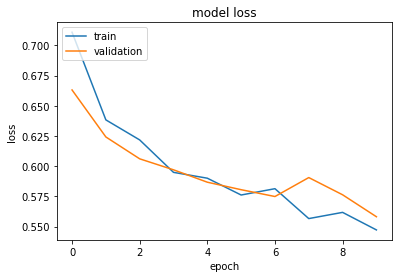

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

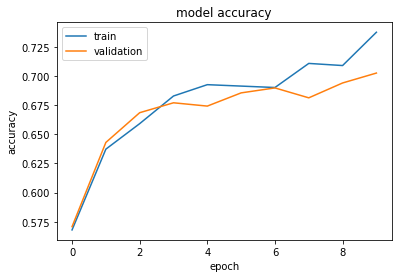

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# **2 Adding Maxpool layer to reduce parameters**

In [ ]:
# importing maxpool layer from keras
from keras.layers import MaxPool2D

In [ ]:
# defining the model architecture with maxpool layer
model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
# adding maxpool layer after the convolutional layers
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))
model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
# summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 25)      1900      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 216, 216, 50)      31300     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 54, 54, 50)        0         
_________________________________________________________________
flatten (Flatten)            (None, 145800)            0         
_________________________________________________________________
dense (Dense)                (None, 100)               14580100  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 14,613,401
Trainable params: 14,613,401
Non-trainable params: 0
__________________________________________

In [ ]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/10
13/13 [==============================] - 16s 1s/step - loss: 0.6770 - accuracy: 0.5863 - val_loss: 0.6766 - val_accuracy: 0.5609
Epoch 2/10
13/13 [==============================] - 11s 839ms/step - loss: 0.6683 - accuracy: 0.5869 - val_loss: 0.6658 - val_accuracy: 0.5609
Epoch 3/10
13/13 [==============================] - 11s 844ms/step - loss: 0.6595 - accuracy: 0.5905 - val_loss: 0.6564 - val_accuracy: 0.5822
Epoch 4/10
13/13 [==============================] - 11s 840ms/step - loss: 0.6496 - accuracy: 0.6124 - val_loss: 0.6462 - val_accuracy: 0.6133
Epoch 5/10
13/13 [==============================] - 11s 847ms/step - loss: 0.6419 - accuracy: 0.6337 - val_loss: 0.6341 - val_accuracy: 0.6586
Epoch 6/10
13/13 [==============================] - 11s 849ms/step - loss: 0.6331 - accuracy: 0.6476 - val_loss: 0.6275 - val_accuracy: 0.6374
Epoch 7/10
13/13 [==============================] - 11s 850ms/step - loss: 0.6208 - accuracy: 0.6616 - val_loss: 0.6169 - val_accuracy: 0.6601
Ep

In [ ]:
# accuracy on training set
print('Accuracy on training set:', accuracy_score(y_train, model.predict_classes(X_train)), '%')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Accuracy on training set: 0.6597812879708383 %


In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)), '%')

Accuracy on validation set: 0.6359773371104815 %


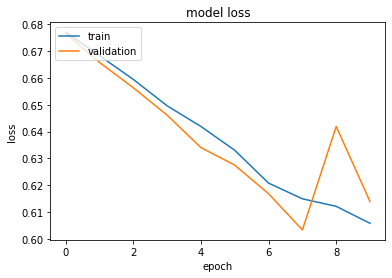

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

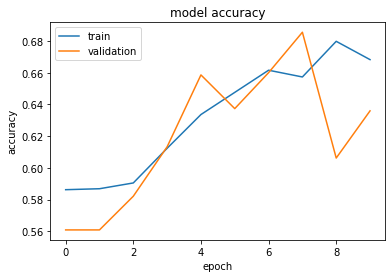

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# **3 Hyperparameter Tuning of Convolutional Neural Networks**

# **3.1 Increasing number of convolutional layers**

In [ ]:
from keras.layers import Conv2D, Flatten
# importing maxpool layer from keras
from keras.layers import MaxPool2D

In [ ]:
# increase number of convolutional layers

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 220, 220, 25)      1900      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 216, 216, 50)      31300     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 212, 212, 50)      62550     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 50)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 140450)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               14045100  
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [ ]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/10
13/13 [==============================] - 38s 3s/step - loss: 0.6782 - accuracy: 0.5863 - val_loss: 0.6850 - val_accuracy: 0.5609
Epoch 2/10
13/13 [==============================] - 25s 2s/step - loss: 0.6751 - accuracy: 0.5863 - val_loss: 0.6812 - val_accuracy: 0.5609
Epoch 3/10
13/13 [==============================] - 25s 2s/step - loss: 0.6723 - accuracy: 0.5863 - val_loss: 0.6777 - val_accuracy: 0.5609
Epoch 4/10
13/13 [==============================] - 25s 2s/step - loss: 0.6686 - accuracy: 0.5863 - val_loss: 0.6725 - val_accuracy: 0.5609
Epoch 5/10
13/13 [==============================] - 25s 2s/step - loss: 0.6641 - accuracy: 0.5863 - val_loss: 0.6672 - val_accuracy: 0.5609
Epoch 6/10
13/13 [==============================] - 25s 2s/step - loss: 0.6579 - accuracy: 0.5887 - val_loss: 0.6616 - val_accuracy: 0.5623
Epoch 7/10
13/13 [==============================] - 25s 2s/step - loss: 0.6500 - accuracy: 0.6069 - val_loss: 0.6487 - val_accuracy: 0.5977
Epoch 8/10
13/13 [==

In [ ]:
# accuracy on training set
print('Accuracy on training set:', accuracy_score(y_train, model.predict_classes(X_train)), '%')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Accuracy on training set: 0.6640340218712029 %


In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)), '%')

Accuracy on validation set: 0.6501416430594901 %


# **3. 2 Increasing number of pooling layers**

In [ ]:
# increase number of pooling layers

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 25)      1900      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 55, 25)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 51, 51, 50)        31300     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 50)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               720100    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [ ]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/10
13/13 [==============================] - 4s 300ms/step - loss: 0.7365 - accuracy: 0.4423 - val_loss: 0.6901 - val_accuracy: 0.5397
Epoch 2/10
13/13 [==============================] - 2s 192ms/step - loss: 0.6804 - accuracy: 0.5838 - val_loss: 0.6888 - val_accuracy: 0.5609
Epoch 3/10
13/13 [==============================] - 2s 189ms/step - loss: 0.6773 - accuracy: 0.5851 - val_loss: 0.6890 - val_accuracy: 0.5609
Epoch 4/10
13/13 [==============================] - 3s 193ms/step - loss: 0.6767 - accuracy: 0.5863 - val_loss: 0.6860 - val_accuracy: 0.5609
Epoch 5/10
13/13 [==============================] - 2s 191ms/step - loss: 0.6753 - accuracy: 0.5857 - val_loss: 0.6852 - val_accuracy: 0.5609
Epoch 6/10
13/13 [==============================] - 3s 197ms/step - loss: 0.6741 - accuracy: 0.5863 - val_loss: 0.6832 - val_accuracy: 0.5609
Epoch 7/10
13/13 [==============================] - 2s 186ms/step - loss: 0.6731 - accuracy: 0.5857 - val_loss: 0.6816 - val_accuracy: 0.5609
Epoch 

In [ ]:
# accuracy on training set
print('Accuracy on training set:', accuracy_score(y_train, model.predict_classes(X_train)), '%')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Accuracy on training set: 0.5856622114216282 %


In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)), '%')

Accuracy on validation set: 0.5609065155807366 %


# **3. 3 Increasing number of convolutional filters**

In [ ]:
# increase number of convolutional filters

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(75, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 220, 220, 50)      3800      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 216, 216, 75)      93825     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 75)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 218700)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               21870100  
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 21,967,826
Trainable params: 21,967,826
Non-trainable params: 0
__________________________________________

In [ ]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/10
13/13 [==============================] - 37s 3s/step - loss: 0.6921 - accuracy: 0.5504 - val_loss: 0.6826 - val_accuracy: 0.5567
Epoch 2/10
13/13 [==============================] - 27s 2s/step - loss: 0.6697 - accuracy: 0.5893 - val_loss: 0.6711 - val_accuracy: 0.5652
Epoch 3/10
13/13 [==============================] - 27s 2s/step - loss: 0.6603 - accuracy: 0.5972 - val_loss: 0.6599 - val_accuracy: 0.5793
Epoch 4/10
13/13 [==============================] - 27s 2s/step - loss: 0.6501 - accuracy: 0.6233 - val_loss: 0.6526 - val_accuracy: 0.5807
Epoch 5/10
13/13 [==============================] - 27s 2s/step - loss: 0.6402 - accuracy: 0.6440 - val_loss: 0.6334 - val_accuracy: 0.6530
Epoch 6/10
13/13 [==============================] - 27s 2s/step - loss: 0.6281 - accuracy: 0.6549 - val_loss: 0.6197 - val_accuracy: 0.6983
Epoch 7/10
13/13 [==============================] - 27s 2s/step - loss: 0.6217 - accuracy: 0.6689 - val_loss: 0.6083 - val_accuracy: 0.6941
Epoch 8/10
13/13 [==

In [ ]:
# accuracy on training set
print('Accuracy on training set:', accuracy_score(y_train, model.predict_classes(X_train)), '%')

Accuracy on training set: 0.5996354799513973 %


In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)), '%')

Accuracy on validation set: 0.6331444759206799 %


# **3. 4 Changing size of convolutional filters**

In [ ]:
# change filter size for convolutional layer

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (3, 3), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50, (3, 3), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 25)      700       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 50)      11300     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 55, 50)        0         
_________________________________________________________________
flatten (Flatten)            (None, 151250)            0         
_________________________________________________________________
dense (Dense)                (None, 100)               15125100  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 15,137,201
Trainable params: 15,137,201
Non-trainable params: 0
____________________________________________

In [ ]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/10
13/13 [==============================] - 12s 890ms/step - loss: 0.6889 - accuracy: 0.5492 - val_loss: 0.6791 - val_accuracy: 0.5581
Epoch 2/10
13/13 [==============================] - 8s 616ms/step - loss: 0.6663 - accuracy: 0.5899 - val_loss: 0.6734 - val_accuracy: 0.5623
Epoch 3/10
13/13 [==============================] - 8s 622ms/step - loss: 0.6544 - accuracy: 0.6094 - val_loss: 0.6758 - val_accuracy: 0.5609
Epoch 4/10
13/13 [==============================] - 8s 622ms/step - loss: 0.6472 - accuracy: 0.6106 - val_loss: 0.6512 - val_accuracy: 0.5892
Epoch 5/10
13/13 [==============================] - 8s 622ms/step - loss: 0.6373 - accuracy: 0.6373 - val_loss: 0.6379 - val_accuracy: 0.6303
Epoch 6/10
13/13 [==============================] - 8s 621ms/step - loss: 0.6253 - accuracy: 0.6616 - val_loss: 0.6251 - val_accuracy: 0.6643
Epoch 7/10
13/13 [==============================] - 8s 622ms/step - loss: 0.6166 - accuracy: 0.6823 - val_loss: 0.6144 - val_accuracy: 0.7054
Epoch

In [ ]:
# accuracy on training set
print('Accuracy on training set:', accuracy_score(y_train, model.predict_classes(X_train)), '%')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Accuracy on training set: 0.6992709599027946 %


In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)), '%')

Accuracy on validation set: 0.6841359773371105 %


# **3. 5 Changing pooling size**

In [ ]:
# change pooling size

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 220, 220, 25)      1900      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 216, 216, 50)      31300     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 108, 108, 50)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 583200)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               58320100  
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 58,353,401
Trainable params: 58,353,401
Non-trainable params: 0
__________________________________________

In [ ]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/10
13/13 [==============================] - 18s 1s/step - loss: 0.6878 - accuracy: 0.5857 - val_loss: 0.6518 - val_accuracy: 0.6275
Epoch 2/10
13/13 [==============================] - 13s 996ms/step - loss: 0.6478 - accuracy: 0.6148 - val_loss: 0.6333 - val_accuracy: 0.6501
Epoch 3/10
13/13 [==============================] - 13s 998ms/step - loss: 0.6293 - accuracy: 0.6513 - val_loss: 0.6143 - val_accuracy: 0.6785
Epoch 4/10
13/13 [==============================] - 13s 1s/step - loss: 0.6124 - accuracy: 0.6628 - val_loss: 0.6382 - val_accuracy: 0.6204
Epoch 5/10
13/13 [==============================] - 13s 999ms/step - loss: 0.6289 - accuracy: 0.6428 - val_loss: 0.6432 - val_accuracy: 0.6190
Epoch 6/10
13/13 [==============================] - 13s 1s/step - loss: 0.5979 - accuracy: 0.6853 - val_loss: 0.5905 - val_accuracy: 0.6898
Epoch 7/10
13/13 [==============================] - 13s 1s/step - loss: 0.5779 - accuracy: 0.7029 - val_loss: 0.5917 - val_accuracy: 0.6884
Epoch 8/10


In [ ]:
# accuracy on training set
print('Accuracy on training set:', accuracy_score(y_train, model.predict_classes(X_train)), '%')

Accuracy on training set: 0.7223572296476306 %


In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)), '%')

Accuracy on validation set: 0.7039660056657224 %


# **3. 6 Changing padding technique**

In [ ]:
# change padding technique

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 25)      1900      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 224, 224, 50)      31300     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 50)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 156800)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15680100  
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 15,713,401
Trainable params: 15,713,401
Non-trainable params: 0
__________________________________________

In [ ]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/10
13/13 [==============================] - 13s 1s/step - loss: 0.6717 - accuracy: 0.5893 - val_loss: 0.6750 - val_accuracy: 0.5609
Epoch 2/10
13/13 [==============================] - 12s 948ms/step - loss: 0.6567 - accuracy: 0.6130 - val_loss: 0.6507 - val_accuracy: 0.5907
Epoch 3/10
13/13 [==============================] - 12s 947ms/step - loss: 0.6474 - accuracy: 0.6330 - val_loss: 0.6318 - val_accuracy: 0.6615
Epoch 4/10
13/13 [==============================] - 12s 937ms/step - loss: 0.6262 - accuracy: 0.6622 - val_loss: 0.6184 - val_accuracy: 0.6700
Epoch 5/10
13/13 [==============================] - 12s 947ms/step - loss: 0.6122 - accuracy: 0.6738 - val_loss: 0.6025 - val_accuracy: 0.6941
Epoch 6/10
13/13 [==============================] - 12s 948ms/step - loss: 0.6124 - accuracy: 0.6810 - val_loss: 0.5936 - val_accuracy: 0.7011
Epoch 7/10
13/13 [==============================] - 12s 947ms/step - loss: 0.6237 - accuracy: 0.6574 - val_loss: 0.5960 - val_accuracy: 0.6955
Ep

In [ ]:
# accuracy on training set
print('Accuracy on training set:', accuracy_score(y_train, model.predict_classes(X_train)), '%')

Accuracy on training set: 0.7174969623329283 %


In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)), '%')

Accuracy on validation set: 0.7025495750708215 %


# **3. 7 Changing stride**

In [22]:
# Normalize the pixel values
X = X / X.max()

In [23]:
# minimum and maximum pixel value of images after normalize
X.min(), X.max()

(0.0, 1.0)

In [24]:
# Creating training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.3, random_state= seed)

In [25]:
# Shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 224, 224, 3), (1646,)), ((706, 224, 224, 3), (706,)))

In [26]:
# changing stride

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(2, 2), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 110, 110, 25)      1900      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 106, 106, 50)      31300     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 50)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 33800)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               3380100   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 3,413,401
Trainable params: 3,413,401
Non-trainable params: 0
____________________________________________

In [28]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/10
13/13 [==============================] - 2s 180ms/step - loss: 0.7024 - accuracy: 0.5863 - val_loss: 0.6786 - val_accuracy: 0.5595
Epoch 2/10
13/13 [==============================] - 2s 123ms/step - loss: 0.6713 - accuracy: 0.5838 - val_loss: 0.6800 - val_accuracy: 0.5609
Epoch 3/10
13/13 [==============================] - 2s 123ms/step - loss: 0.6695 - accuracy: 0.5851 - val_loss: 0.6721 - val_accuracy: 0.5595
Epoch 4/10
13/13 [==============================] - 2s 123ms/step - loss: 0.6662 - accuracy: 0.5838 - val_loss: 0.6674 - val_accuracy: 0.5567
Epoch 5/10
13/13 [==============================] - 2s 125ms/step - loss: 0.6640 - accuracy: 0.5851 - val_loss: 0.6647 - val_accuracy: 0.5595
Epoch 6/10
13/13 [==============================] - 2s 120ms/step - loss: 0.6609 - accuracy: 0.5863 - val_loss: 0.6602 - val_accuracy: 0.6105
Epoch 7/10
13/13 [==============================] - 2s 124ms/step - loss: 0.6586 - accuracy: 0.5911 - val_loss: 0.6564 - val_accuracy: 0.6317
Epoch 

In [29]:
# accuracy on training set
print('Accuracy on training set:', accuracy_score(y_train, model.predict_classes(X_train)), '%')

Accuracy on training set: 0.6312272174969623 %


In [30]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)), '%')

Accuracy on validation set: 0.6218130311614731 %


# **4. Combining Hyperparameter tuning**

In [34]:
# importing layers from keras
from keras.layers import Dense, InputLayer, BatchNormalization, Dropout

In [35]:
# defining the model architecture with maxpool layer

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.6))
model.add(Dense(units=100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.6))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 220, 220, 50)      3800      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 110, 110, 50)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 106, 106, 50)      62550     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 26, 26, 50)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 33800)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               3380100   
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)              

In [37]:
# training the model for 100 epochs
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/100
13/13 [==============================] - 5s 369ms/step - loss: 0.8702 - accuracy: 0.5990 - val_loss: 0.6125 - val_accuracy: 0.6771
Epoch 2/100
13/13 [==============================] - 3s 230ms/step - loss: 0.6832 - accuracy: 0.7084 - val_loss: 0.6249 - val_accuracy: 0.7011
Epoch 3/100
13/13 [==============================] - 3s 232ms/step - loss: 0.5977 - accuracy: 0.7296 - val_loss: 0.4725 - val_accuracy: 0.7677
Epoch 4/100
13/13 [==============================] - 3s 227ms/step - loss: 0.5344 - accuracy: 0.7625 - val_loss: 0.4767 - val_accuracy: 0.7819
Epoch 5/100
13/13 [==============================] - 3s 232ms/step - loss: 0.4705 - accuracy: 0.7843 - val_loss: 0.4441 - val_accuracy: 0.8144
Epoch 6/100
13/13 [==============================] - 3s 230ms/step - loss: 0.4239 - accuracy: 0.8171 - val_loss: 0.5591 - val_accuracy: 0.7252
Epoch 7/100
13/13 [==============================] - 3s 231ms/step - loss: 0.3799 - accuracy: 0.8378 - val_loss: 0.3908 - val_accuracy: 0.8201

In [38]:
# accuracy on training set
print('Accuracy on training set:', accuracy_score(y_train, model.predict_classes(X_train)), '%')

Accuracy on training set: 0.9975698663426489 %


In [39]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)), '%')

Accuracy on validation set: 0.8257790368271954 %


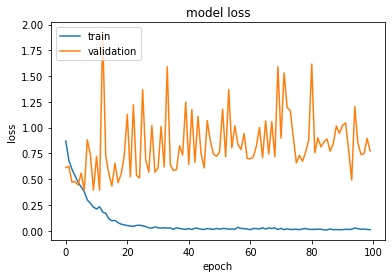

In [40]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

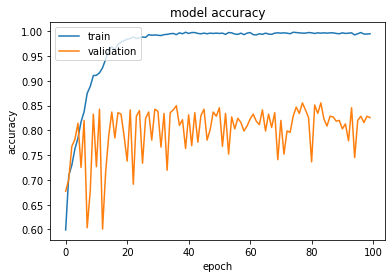

In [42]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# **5 Model Checkpoint in CNN**

In [50]:
# Normalize the pixel values
X = X / X.max()

In [51]:
# minimum and maximum pixel value of images after normalize
X.min(), X.max()

(0.0, 1.0)

In [52]:
# Creating training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.3, random_state= seed)

In [53]:
# Shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 224, 224, 3), (1646,)), ((706, 224, 224, 3), (706,)))

# **5.1 Defining the Model Architecture**

In [54]:
# importing the convolutional and flatten layer from keras
from keras.layers import Conv2D, Flatten, MaxPool2D

In [55]:
# defining the model architecture with maxpool layer

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.6))
model.add(Dense(units=100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.6))
model.add(Dense(units=1, activation='sigmoid'))

In [56]:
# printing summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 220, 220, 50)      3800      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 110, 110, 50)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 106, 106, 50)      62550     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 26, 26, 50)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 33800)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               3380100   
_________________________________________________________________
batch_normalization_4 (Batch (None, 100)              

In [57]:
# compiling the model
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

# **5.2 Training the Model**

In [58]:
# defining model checkpointing
from keras.callbacks import ModelCheckpoint

# defining the path to save the model
path = 'best_model.hdf5'

# defining model checkpointing
checkpoint = ModelCheckpoint(path, monitor='val_accuracy', verbose = 1, save_best_only = True, mode='max')

# defining callback list
callback_list = [checkpoint]

In [59]:
# training the model for 100 epochs
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid), callbacks=callback_list)

Epoch 1/100
13/13 [==============================] - ETA: 0s - loss: 0.9550 - accuracy: 0.5680
Epoch 00001: val_accuracy improved from -inf to 0.56232, saving model to best_model.hdf5
13/13 [==============================] - 3s 266ms/step - loss: 0.9550 - accuracy: 0.5680 - val_loss: 1.2127 - val_accuracy: 0.5623
Epoch 2/100
13/13 [==============================] - ETA: 0s - loss: 0.6967 - accuracy: 0.7029
Epoch 00002: val_accuracy improved from 0.56232 to 0.72805, saving model to best_model.hdf5
13/13 [==============================] - 3s 236ms/step - loss: 0.6967 - accuracy: 0.7029 - val_loss: 0.5749 - val_accuracy: 0.7280
Epoch 3/100
13/13 [==============================] - ETA: 0s - loss: 0.6545 - accuracy: 0.7108
Epoch 00003: val_accuracy did not improve from 0.72805
13/13 [==============================] - 3s 228ms/step - loss: 0.6545 - accuracy: 0.7108 - val_loss: 1.0692 - val_accuracy: 0.6501
Epoch 4/100
13/13 [==============================] - ETA: 0s - loss: 0.5593 - accuracy

In [60]:
model.load_weights('best_model.hdf5')

In [61]:
# accuracy on training set
print('Accuracy on training set:', accuracy_score(y_train, model.predict_classes(X_train)), '%')

Accuracy on training set: 0.9975698663426489 %


In [62]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)), '%')

Accuracy on validation set: 0.8526912181303116 %
